In [1]:
import sys
import pandas as pd 
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.clean import clean_data
# Load data
# Define the correct SQL query
sql_query =  """
SELECT * FROM xdr_data;
"""
df = load_data(sql_query)


ModuleNotFoundError: No module named 'matplotlib'

In [58]:
# print few rows of dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [59]:
# identify the column names
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [60]:
# display summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [61]:
# summary of the statistical characteristics of the numeric columns
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [62]:
# check  missing values
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [63]:
# apply the cleaning function
df = clean_data(df)


In [64]:
# Assuming your DataFrame is named 'df'
variable_info = df.dtypes.reset_index()
variable_info.columns = ['Variable Name', 'Data Type']
print(variable_info)


                               Variable Name Data Type
0                                  Bearer Id   float64
1                                      Start    object
2                                   Start ms   float64
3                                        End    object
4                                     End ms   float64
5                                  Dur. (ms)   float64
6                                       IMSI   float64
7                              MSISDN/Number   float64
8                                       IMEI   float64
9                         Last Location Name    object
10                           Avg RTT DL (ms)   float64
11                           Avg RTT UL (ms)   float64
12                   Avg Bearer TP DL (kbps)   float64
13                   Avg Bearer TP UL (kbps)   float64
14               TCP DL Retrans. Vol (Bytes)   float64
15               TCP UL Retrans. Vol (Bytes)   float64
16                       DL TP < 50 Kbps (%)   float64
17        

In [65]:

# Create a DataFrame from the dtypes of df
variable_info = df.dtypes.reset_index()
variable_info.columns = ['Variable Name', 'Data Type']

# Convert Data Type to a string for easy filtering
variable_info['Data Type'] = variable_info['Data Type'].astype(str)

# Filter to get only those variables whose Data Type is 'object'
object_variables = variable_info[variable_info['Data Type'] == 'float64']

# Print the filtered DataFrame
print("Variables with Data Type as 'object':")
print(object_variables)


Variables with Data Type as 'object':
                               Variable Name Data Type
0                                  Bearer Id   float64
2                                   Start ms   float64
4                                     End ms   float64
5                                  Dur. (ms)   float64
6                                       IMSI   float64
7                              MSISDN/Number   float64
8                                       IMEI   float64
10                           Avg RTT DL (ms)   float64
11                           Avg RTT UL (ms)   float64
12                   Avg Bearer TP DL (kbps)   float64
13                   Avg Bearer TP UL (kbps)   float64
14               TCP DL Retrans. Vol (Bytes)   float64
15               TCP UL Retrans. Vol (Bytes)   float64
16                       DL TP < 50 Kbps (%)   float64
17            50 Kbps < DL TP < 250 Kbps (%)   float64
18             250 Kbps < DL TP < 1 Mbps (%)   float64
19                        D

In [66]:

# Create a DataFrame from the dtypes of df
variable_info = df.dtypes.reset_index()
variable_info.columns = ['Variable Name', 'Data Type']

# Convert Data Type to a string for easy filtering
variable_info['Data Type'] = variable_info['Data Type'].astype(str)

# Filter to get only those variables whose Data Type is 'object'
object_variables = variable_info[variable_info['Data Type'] == 'object']

# Print the filtered DataFrame
print("Variables with Data Type as 'object':")
print(object_variables)


Variables with Data Type as 'object':
           Variable Name Data Type
1                  Start    object
3                    End    object
9     Last Location Name    object
29  Handset Manufacturer    object
30          Handset Type    object


In [67]:

# Assuming your DataFrame is named 'df'
# Create a DataFrame from the dtypes of df
variable_info = df.dtypes.reset_index()
variable_info.columns = ['Variable Name', 'Data Type']

# Convert Data Type to a string for easy filtering
variable_info['Data Type'] = variable_info['Data Type'].astype(str)

# Filter to get only those variables whose Data Type is NOT 'object' or 'float64'
non_object_float_vars = variable_info[(variable_info['Data Type'] != 'object') & (variable_info['Data Type'] != 'float64')]

# Print the filtered DataFrame
print("Variables NOT of Data Type 'object' or 'float64':")
print(non_object_float_vars)


Variables NOT of Data Type 'object' or 'float64':
Empty DataFrame
Columns: [Variable Name, Data Type]
Index: []


### Q.Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.

In [68]:
# General descriptive statistics
summary_stats = df.describe()
summary_stats

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,150001.000000,1.494310e+05,1.489350e+05,1.494290e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,91980.342251,2.082016e+14,4.188282e+10,4.847455e+13,46.622169,7.135372,6776.175892,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.111975e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,49294.358994,2.148809e+10,2.447443e+12,2.241637e+13,19.304219,7.067340,12624.783394,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.119712e+07,2.441421e+08
min,6.917538e+18,0.000000,0.000000,7142.000000,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,9.512288e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,57442.000000,2.082014e+14,3.365130e+10,3.546071e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.324942e+07,2.431072e+08
50%,7.349883e+18,499.000000,500.000000,86399.000000,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,116737.000000,2.082018e+14,3.368349e+10,8.611970e+13,51.000000,7.000000,6901.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.900537e+07,6.657051e+08
max,1.318654e+19,999.000000,999.000000,244900.000000,2.140743e+14,8.823971e+14,9.900120e+13,127.000000,34.000000,49211.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.271475e+07,9.029696e+08


In [69]:
import numpy as np

# Drop non-numeric columns for statistical analysis, if they are not needed
df_numeric = df.select_dtypes(include=[np.number])

# Fill missing values with the mean of each column
df_numeric = df_numeric.apply(lambda x: x.fillna(x.mean()), axis=0)

mean = df_numeric.mean()

# Convert the Series to a DataFrame for better formatting 
mean = mean.reset_index()
mean.columns = ['Variable Name', 'Mean']
# Print the DataFrame
print(mean)


                               Variable Name          Mean
0                                  Bearer Id  1.013887e+19
1                                   Start ms  4.991882e+02
2                                     End ms  4.988009e+02
3                                  Dur. (ms)  9.198034e+04
4                                       IMSI  2.082016e+14
5                              MSISDN/Number  4.188282e+10
6                                       IMEI  4.847455e+13
7                            Avg RTT DL (ms)  4.662217e+01
8                            Avg RTT UL (ms)  7.135372e+00
9                    Avg Bearer TP DL (kbps)  6.776176e+03
10                   Avg Bearer TP UL (kbps)  3.228239e+02
11               TCP DL Retrans. Vol (Bytes)  8.305350e+05
12               TCP UL Retrans. Vol (Bytes)  2.486128e+04
13                       DL TP < 50 Kbps (%)  9.284475e+01
14            50 Kbps < DL TP < 250 Kbps (%)  3.069355e+00
15             250 Kbps < DL TP < 1 Mbps (%)  1.717341e+

In [70]:
# Calculate the median for each column
medians = df_numeric.median()

# Convert the Series to a DataFrame for better formatting and presentation
median_df = medians.reset_index()
median_df.columns = ['Variable Name', 'Median']

# Print the DataFrame
print(median_df)


                               Variable Name        Median
0                                  Bearer Id  7.349883e+18
1                                   Start ms  4.990000e+02
2                                     End ms  5.000000e+02
3                                  Dur. (ms)  8.639900e+04
4                                       IMSI  2.082015e+14
5                              MSISDN/Number  3.366380e+10
6                                       IMEI  3.572241e+13
7                            Avg RTT DL (ms)  4.500000e+01
8                            Avg RTT UL (ms)  5.000000e+00
9                    Avg Bearer TP DL (kbps)  6.300000e+01
10                   Avg Bearer TP UL (kbps)  6.300000e+01
11               TCP DL Retrans. Vol (Bytes)  5.687300e+05
12               TCP UL Retrans. Vol (Bytes)  2.094950e+04
13                       DL TP < 50 Kbps (%)  1.000000e+02
14            50 Kbps < DL TP < 250 Kbps (%)  0.000000e+00
15             250 Kbps < DL TP < 1 Mbps (%)  0.000000e+

In [71]:
# Convert the Series to a DataFrame for better formatting and presentation
std_deviation = df_numeric.std()
std_deviation  = std_deviation.reset_index()
std_deviation.columns = ['Variable Name', 'std_deviation']

# Print the DataFrame
print(std_deviation)


                               Variable Name  std_deviation
0                                  Bearer Id   2.883600e+18
1                                   Start ms   2.886109e+02
2                                     End ms   2.880967e+02
3                                  Dur. (ms)   4.929436e+04
4                                       IMSI   2.144722e+10
5                              MSISDN/Number   2.438731e+12
6                                       IMEI   2.237359e+13
7                            Avg RTT DL (ms)   1.930422e+01
8                            Avg RTT UL (ms)   7.067340e+00
9                    Avg Bearer TP DL (kbps)   1.262478e+04
10                   Avg Bearer TP UL (kbps)   5.629461e+02
11               TCP DL Retrans. Vol (Bytes)   1.264921e+06
12               TCP UL Retrans. Vol (Bytes)   2.506474e+04
13                       DL TP < 50 Kbps (%)   1.300522e+01
14            50 Kbps < DL TP < 250 Kbps (%)   6.199592e+00
15             250 Kbps < DL TP < 1 Mbps

## Computing Dispersion

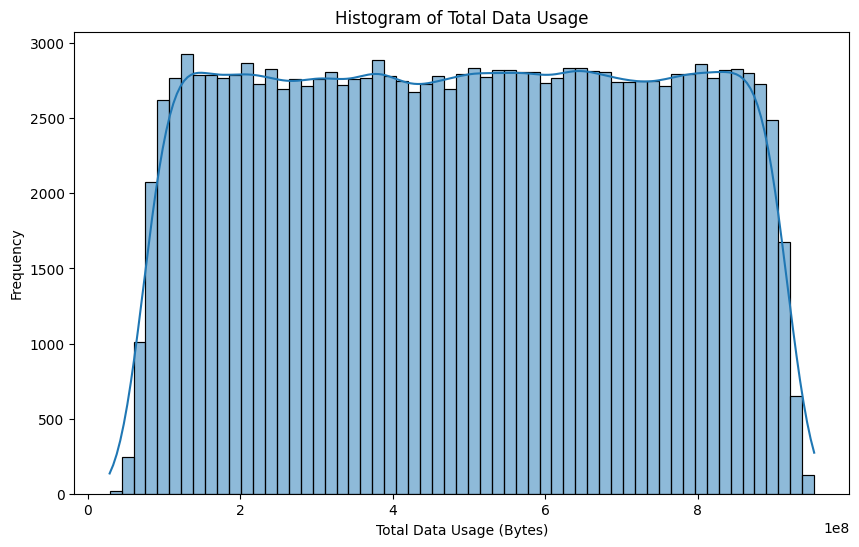

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Total Data Usage by summing download and upload bytes
df['Total Data Usage (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Histogram for total data usage
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Data Usage (Bytes)'], kde=True)
plt.title('Histogram of Total Data Usage')
plt.xlabel('Total Data Usage (Bytes)')
plt.ylabel('Frequency')
plt.show()


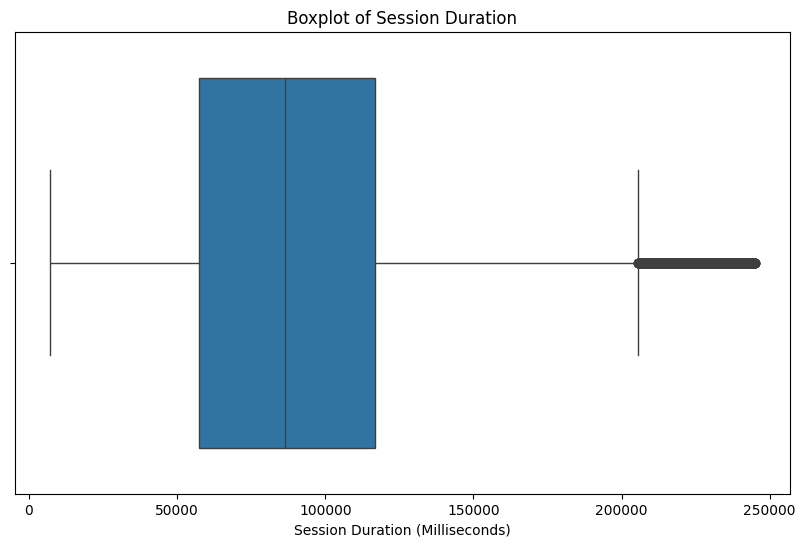

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Dur. (ms)'])
plt.title('Boxplot of Session Duration')
plt.xlabel('Session Duration (Milliseconds)')
plt.show()


## Perform Variable Transformations

In [74]:
# Calculate Total Session Duration for Each User
# Aggregate session durations to get the total duration per user
total_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
total_duration_per_user.rename(columns={'Dur. (ms)': 'Total Duration (ms)'}, inplace=True)


In [75]:
# Calculate total data usage per user
df['Total Data (Bytes)'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']
total_data_per_user = df.groupby('MSISDN/Number')['Total Data (Bytes)'].sum().reset_index()

# Merge total duration and total data usage
user_summary = pd.merge(total_duration_per_user, total_data_per_user, on='MSISDN/Number')


In [76]:
# Create decile classes based on total session duration
user_summary['Duration Decile'] = pd.qcut(user_summary['Total Duration (ms)'], 10, labels=False, duplicates='drop')

# Filter for top five deciles
top_deciles = user_summary[user_summary['Duration Decile'] >= 5]  # Adjust based on the total number of deciles


In [77]:
# Compute total data usage per decile class
total_data_per_decile = top_deciles.groupby('Duration Decile')['Total Data (Bytes)'].sum()
total_data_per_decile

Duration Decile
5    6.402716e+12
6    6.114634e+12
7    7.512619e+12
8    8.525038e+12
9    1.622412e+13
Name: Total Data (Bytes), dtype: float64

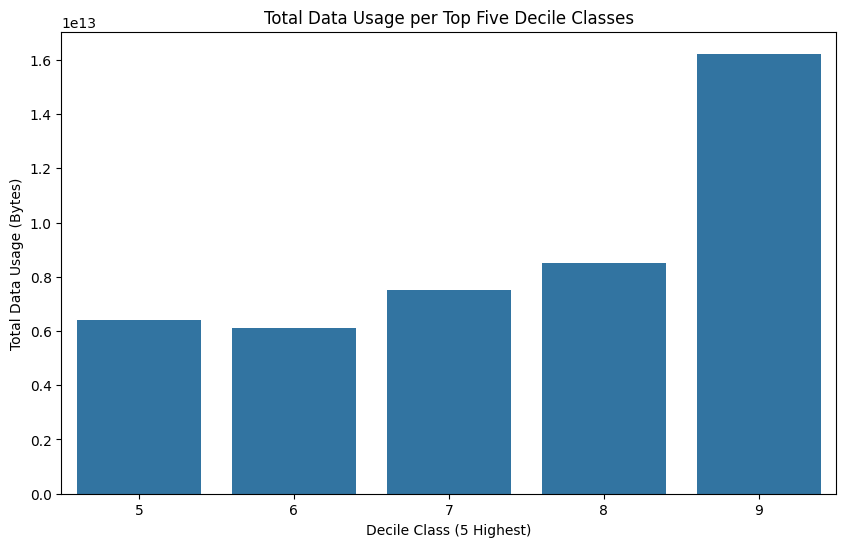

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=total_data_per_decile.index, y=total_data_per_decile.values)
plt.title('Total Data Usage per Top Five Decile Classes')
plt.xlabel('Decile Class (5 Highest)')
plt.ylabel('Total Data Usage (Bytes)')
plt.show()


## Correlation Analysis 

In [79]:
# Assuming you have download and upload data for each category separately, calculate the total for each
df['Total Social Media (Bytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total Google (Bytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total Email (Bytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Total Youtube (Bytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Total Netflix (Bytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Total Gaming (Bytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Total Other (Bytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']


In [80]:
# Select relevant columns for the correlation matrix
data_columns = [
    'Total Social Media (Bytes)',
    'Total Google (Bytes)',
    'Total Email (Bytes)',
    'Total Youtube (Bytes)',
    'Total Netflix (Bytes)',
    'Total Gaming (Bytes)',
    'Total Other (Bytes)'
]

# Compute the correlation matrix
correlation_matrix = df[data_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


                            Total Social Media (Bytes)  Total Google (Bytes)  \
Total Social Media (Bytes)                    1.000000             -0.001708   
Total Google (Bytes)                         -0.001708              1.000000   
Total Email (Bytes)                           0.004032             -0.000412   
Total Youtube (Bytes)                         0.000548              0.002277   
Total Netflix (Bytes)                         0.001013             -0.001902   
Total Gaming (Bytes)                          0.001082             -0.000994   
Total Other (Bytes)                           0.006065             -0.001727   

                            Total Email (Bytes)  Total Youtube (Bytes)  \
Total Social Media (Bytes)             0.004032               0.000548   
Total Google (Bytes)                  -0.000412               0.002277   
Total Email (Bytes)                    1.000000              -0.002919   
Total Youtube (Bytes)                 -0.002919               1

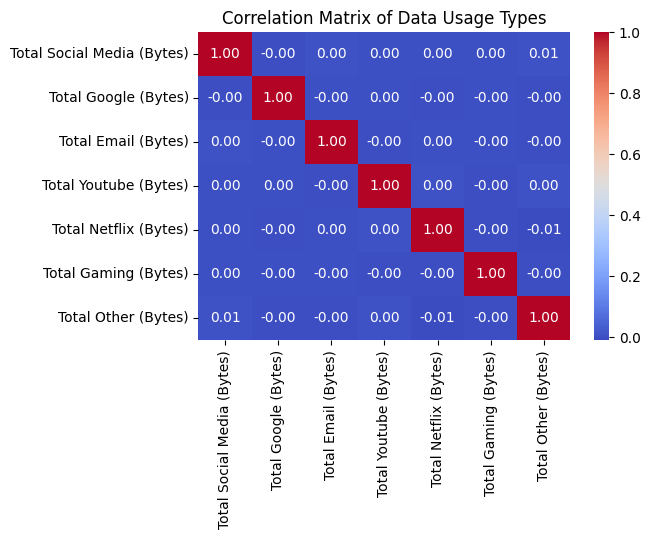

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Data Usage Types')
plt.show()


## Performing PCA on Dataset:


In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data first
features = ['Total Social Media (Bytes)', 'Total Google (Bytes)', 'Total Email (Bytes)', 
            'Total Youtube (Bytes)', 'Total Netflix (Bytes)', 'Total Gaming (Bytes)', 
            'Total Other (Bytes)']
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to two dimensions for easy visualization
principal_components = pca.fit_transform(x)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Amount of variance explained by each component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.14435994, 0.14375118])

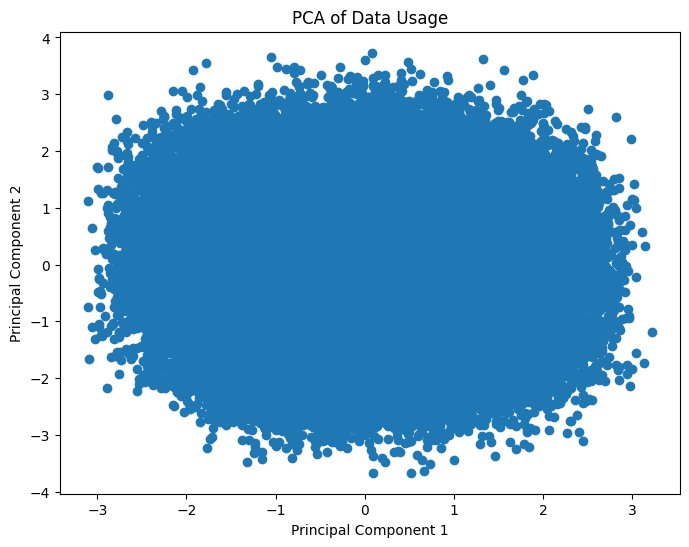

In [83]:
import matplotlib.pyplot as plt

# Assuming 'principal_df' is the DataFrame obtained after applying PCA
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA of Data Usage')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
